In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Optional: Set plotting style
sns.set(style='whitegrid')

In [31]:
# Load the adjusted party-community table
party_community_df = pd.read_csv('../data/party_community_table_adjusted.csv')

# Load the results summary
results_summary_df = pd.read_csv('../data/results_summary.csv')

# Load the detailed results
detailed_results_df = pd.read_csv('../data/detailed_results.csv')

In [32]:
# Preview the party-community DataFrame
print("Party-Community Data:")
display(party_community_df.head())

# Preview the results summary DataFrame
print("\nResults Summary Data:")
display(results_summary_df.head())

# Preview the detailed results DataFrame
print("\nDetailed Results Data:")
display(detailed_results_df.head())

Party-Community Data:


,party,2003_0,2003_1,2003_2,2004_0,2004_1,2004_2,2005_0,2005_1,2005_2,...,2020_2,2021_0,2021_1,2021_2,2022_0,2022_1,2022_2,2023_0,2023_1,2023_2
0,PT,9.0,7.0,4.0,60.0,1.0,0,88.0,2.0,0,...,0,58.0,0.0,0,60.0,0.0,0.0,69.0,0.0,0.0
1,PSDB,6.0,1.0,1.0,3.0,33.0,0,6.0,54.0,0,...,0,21.0,22.0,0,12.0,28.0,0.0,7.0,12.0,1.0
2,PP,2.0,0.0,0.0,17.0,17.0,0,32.0,17.0,0,...,0,0.0,26.0,0,1.0,28.0,0.0,10.0,28.0,1.0
3,PSB,1.0,2.0,1.0,14.0,6.0,0,22.0,5.0,0,...,0,30.0,6.0,0,26.0,12.0,0.0,18.0,5.0,1.0
4,PFL,5.0,10.0,5.0,3.0,44.0,0,10.0,56.0,0,...,0,1.0,6.0,0,2.0,7.0,0.0,4.0,1.0,0.0



Results Summary Data:


,Year,Optimal Pruning Percentage (%),Number of Communities,Modularity,Polarization Lower Bound (%),Polarization Upper Bound (%)
0,2006,46,3,0.396431,40,60
1,2005,42,2,0.350524,30,70
2,2004,26,2,0.488004,40,60
3,2003,2,3,0.560594,40,60
4,2010,44,3,0.229066,30,70



Detailed Results Data:


,Year,Polarization Lower Bound (%),Polarization Upper Bound (%),Pruning Percentage (%),Number of Communities,Modularity
0,2006,0,100,0,9,0.017445
1,2006,0,100,2,9,0.017470
2,2006,0,100,4,11,0.017538
3,2006,0,100,6,4,0.018024
4,2006,0,100,8,4,0.018604


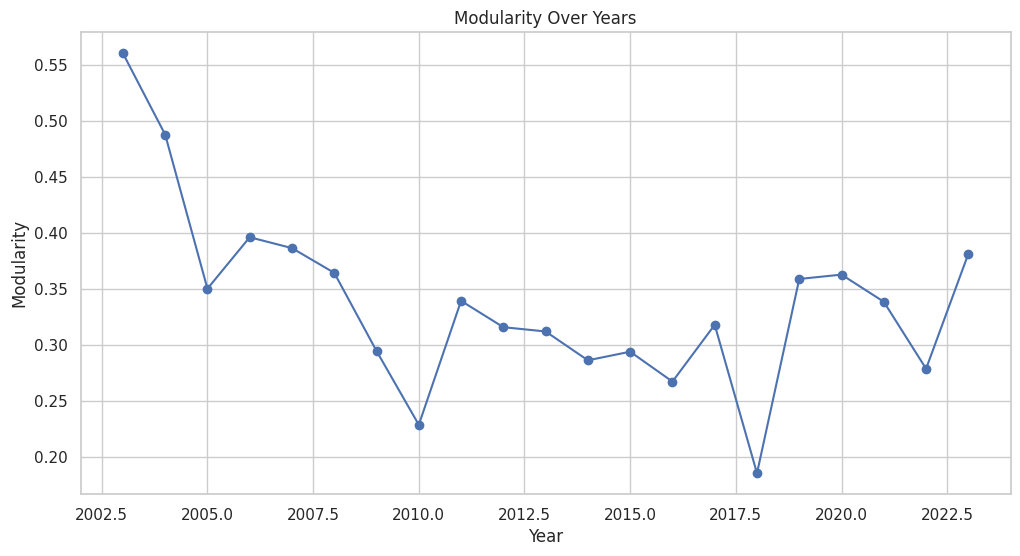

In [33]:
# Convert 'Year' column to numeric if it's not already
results_summary_df['Year'] = pd.to_numeric(results_summary_df['Year'], errors='coerce')

# Sort the DataFrame by Year
results_summary_df.sort_values('Year', inplace=True)

# Plot Modularity over Years
plt.figure(figsize=(12, 6))
plt.plot(results_summary_df['Year'], results_summary_df['Modularity'], marker='o')
plt.title('Modularity Over Years')
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.grid(True)
plt.show()

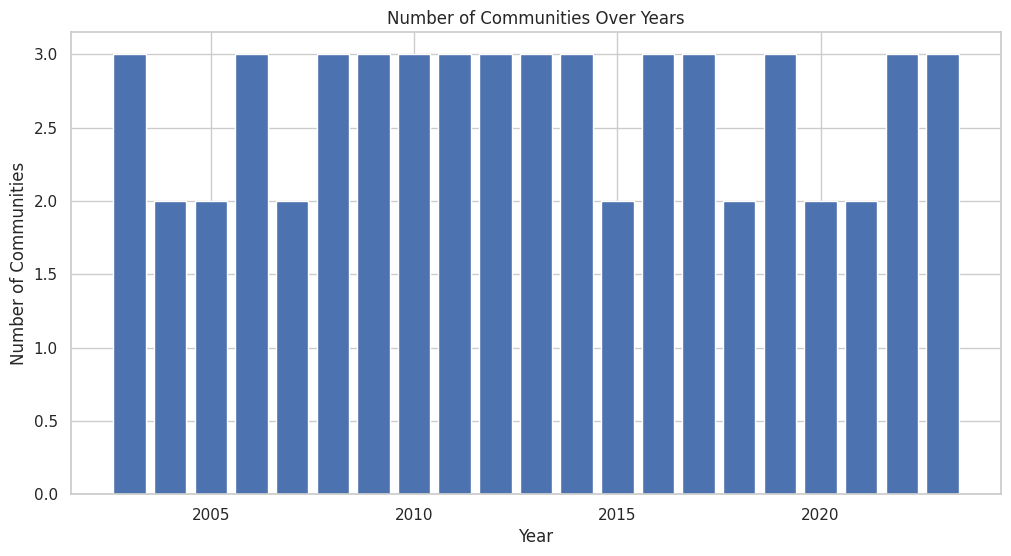

In [34]:
# Plot Number of Communities over Years
plt.figure(figsize=(12, 6))
plt.bar(results_summary_df['Year'], results_summary_df['Number of Communities'])
plt.title('Number of Communities Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Communities')
plt.show()

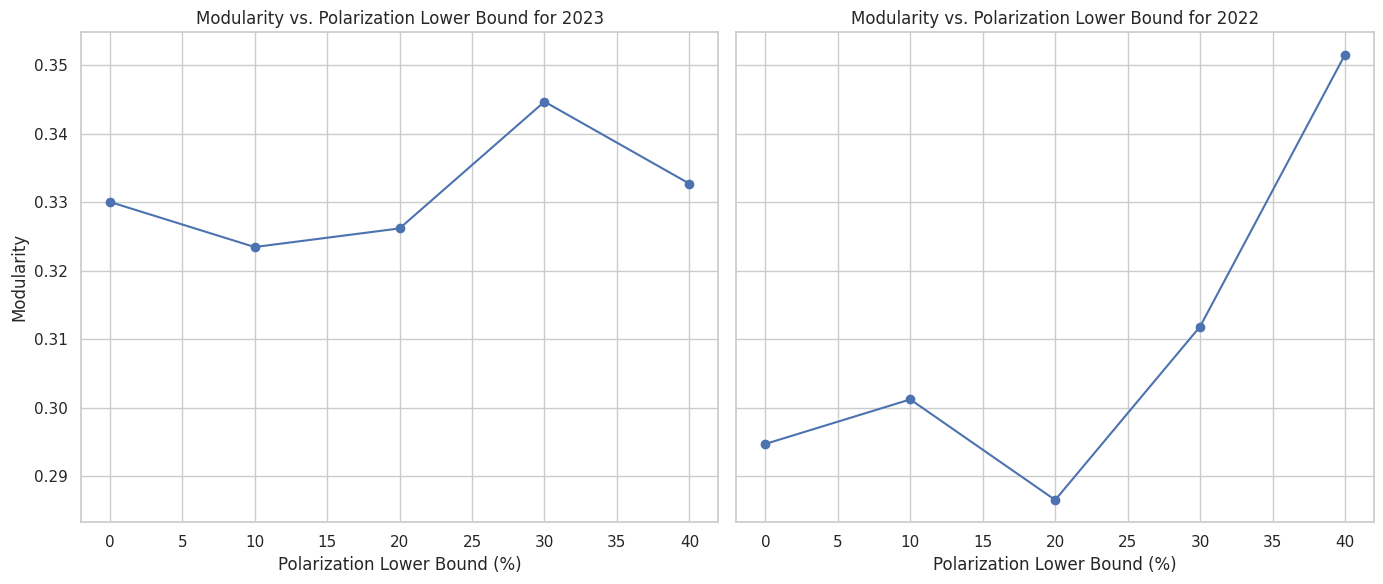

In [35]:
# Filter detailed_results_df for the years 2023 and 2022
years = [2023, 2022]
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, year in enumerate(years):
    year_data = detailed_results_df[detailed_results_df['Year'] == year]
    
    # Calculate average modularity for each polarization lower bound
    modularity_by_polarization = year_data.groupby('Polarization Lower Bound (%)')['Modularity'].mean().reset_index()
    
    # Plotting
    axes[idx].plot(modularity_by_polarization['Polarization Lower Bound (%)'], modularity_by_polarization['Modularity'], marker='o')
    axes[idx].set_title(f'Modularity vs. Polarization Lower Bound for {year}')
    axes[idx].set_xlabel('Polarization Lower Bound (%)')
    if idx == 0:
        axes[idx].set_ylabel('Modularity')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

In [36]:
results_summary_df


,Year,Optimal Pruning Percentage (%),Number of Communities,Modularity,Polarization Lower Bound (%),Polarization Upper Bound (%)
3,2003,2,3,0.560594,40,60
2,2004,26,2,0.488004,40,60
1,2005,42,2,0.350524,30,70
0,2006,46,3,0.396431,40,60
5,2007,38,2,0.386722,40,60
7,2008,40,3,0.364656,40,60
6,2009,42,3,0.294934,40,60
4,2010,44,3,0.229066,30,70
8,2011,42,3,0.339670,40,60
11,2012,42,3,0.316174,40,60


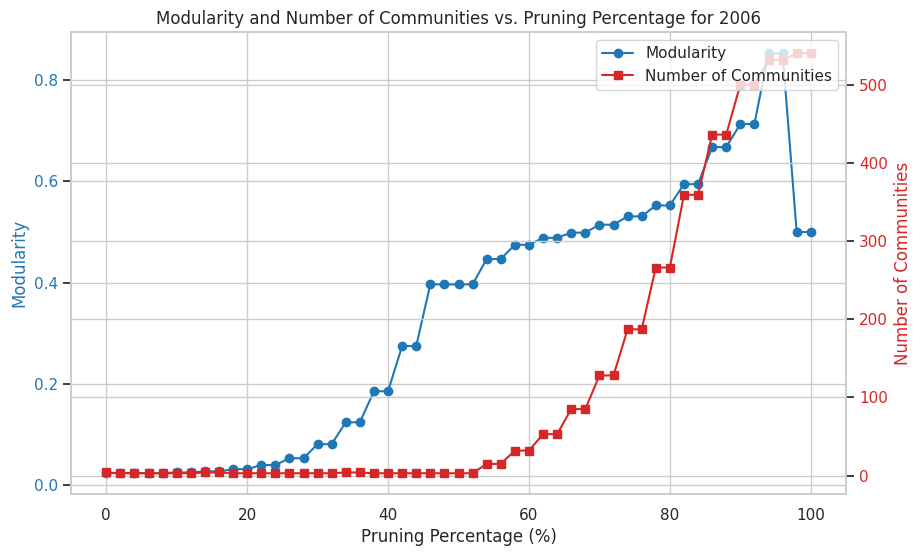

In [37]:
# Filter data for the optimal polarization bounds for 2006
year = 2006
optimal_polarization = results_summary_df[results_summary_df['Year'] == year]
lower_bound = optimal_polarization['Polarization Lower Bound (%)'].values[0]
upper_bound = optimal_polarization['Polarization Upper Bound (%)'].values[0]

# Filter detailed_results_df for the optimal polarization bounds
filtered_data = detailed_results_df[
    (detailed_results_df['Year'] == year) &
    (detailed_results_df['Polarization Lower Bound (%)'] == lower_bound) &
    (detailed_results_df['Polarization Upper Bound (%)'] == upper_bound)
]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Pruning Percentage (%)')
ax1.set_ylabel('Modularity', color=color)
ax1.plot(filtered_data['Pruning Percentage (%)'], filtered_data['Modularity'], color=color, marker='o', label='Modularity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Number of Communities', color=color)
ax2.plot(filtered_data['Pruning Percentage (%)'], filtered_data['Number of Communities'], color=color, marker='s', label='Number of Communities')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title(f'Modularity and Number of Communities vs. Pruning Percentage for {year}')
plt.show()


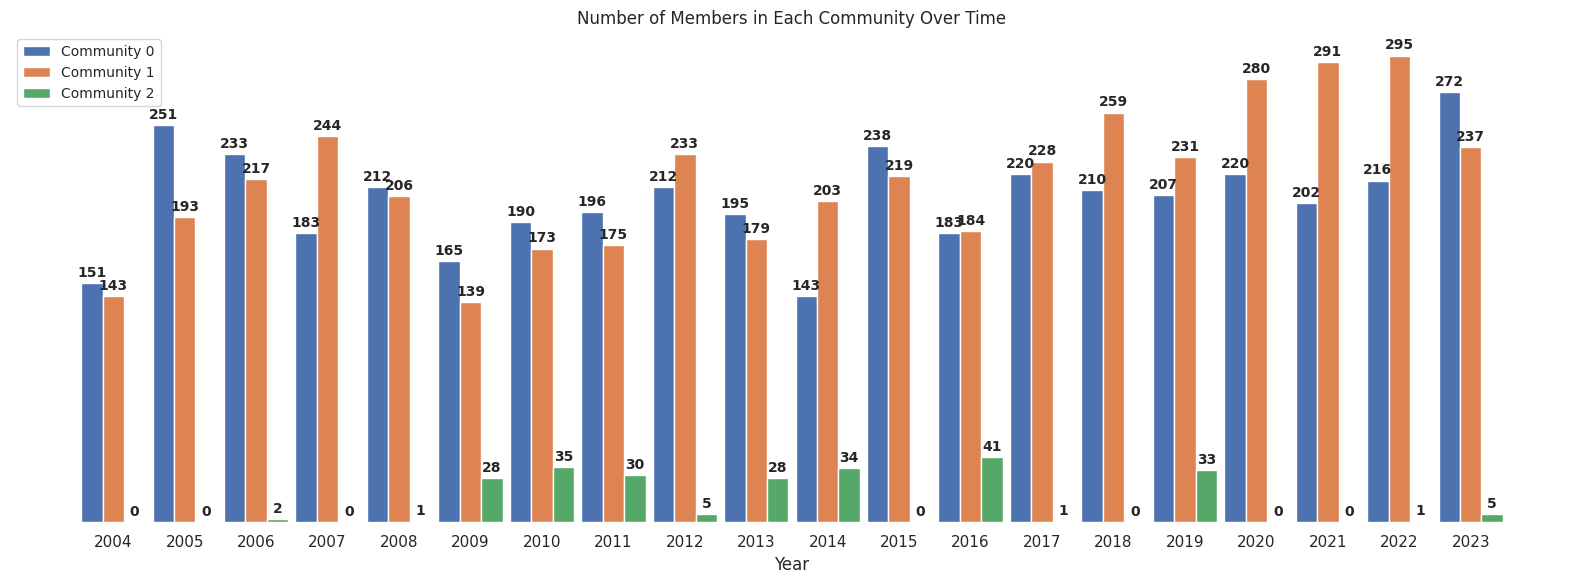

In [38]:
# Prepare data for plotting
years = sorted(party_community_df.columns[1:].str.extract('(\d{4})_', expand=False).unique())
communities = [0, 1, 2]

# Filter years between 2004 and 2023
years = [year for year in years if 2004 <= int(year) <= 2023]

# Initialize data structure
members_per_community = {year: {community: 0 for community in communities} for year in years}

# Aggregate number of members per community for each year
for year in years:
    for community in communities:
        column_name = f"{year}_{community}"
        if column_name in party_community_df.columns:
            members_per_community[year][community] = party_community_df[column_name].sum()

# Convert to DataFrame for plotting
members_df = pd.DataFrame.from_dict(members_per_community, orient='index').reset_index()
members_df.rename(columns={'index': 'Year'}, inplace=True)
members_df['Year'] = members_df['Year'].astype(int)
members_df.sort_values('Year', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))
width = 0.9  # Width of each bar
spacing_factor = 3  # Increase space between years

x = np.arange(len(members_df['Year'])) * spacing_factor  # Increase space between groups of bars

# Plot bars and add rounded values on top of each bar in bold with adjusted position
for idx, community in enumerate(communities):
    bars = ax.bar(x + idx * width, members_df[community], width, label=f'Community {community}')
    for bar in bars:
        height = round(bar.get_height())  # Round to nearest integer
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
            height + 2,                        # Position vertically above the bar with slight offset
            f'{height}',                       # Display the value
            ha='center', va='bottom', fontsize=10, fontweight='bold'  # Center alignment, font size, and bold
        )

# Customize the plot
ax.set_xlabel('Year')
ax.set_title('Number of Members in Each Community Over Time')
ax.set_xticks(x + width)  # Adjust x-ticks to match the new spacing
ax.set_xticklabels(members_df['Year'])
ax.legend(fontsize=10)  # Reduce the font size of the legend

# Remove background lines and Y-axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

# Remove vertical grid lines
ax.grid(False)

plt.tight_layout()
plt.show()



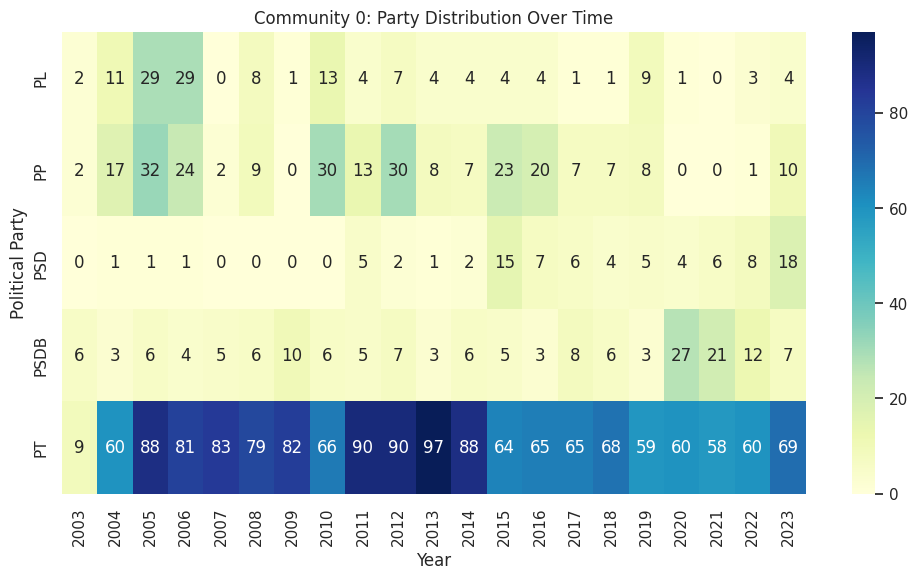

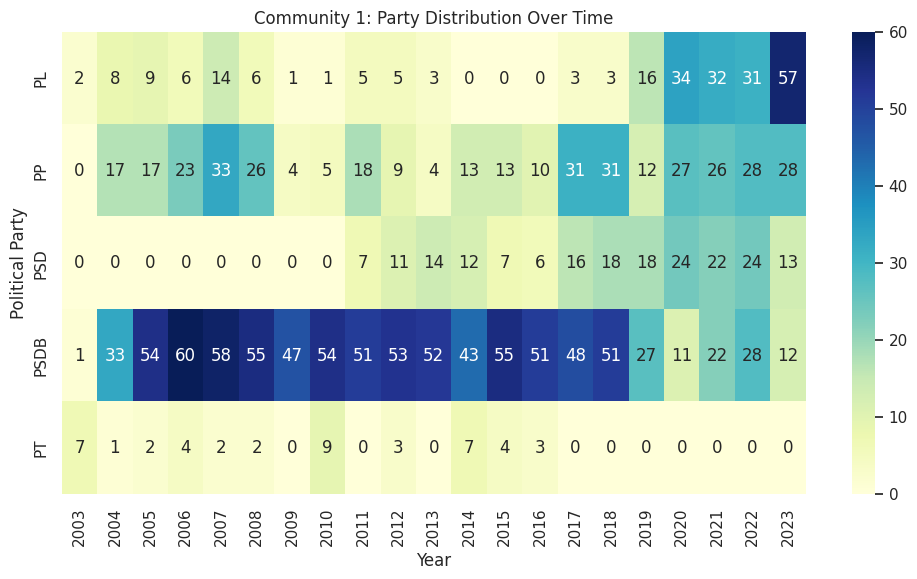

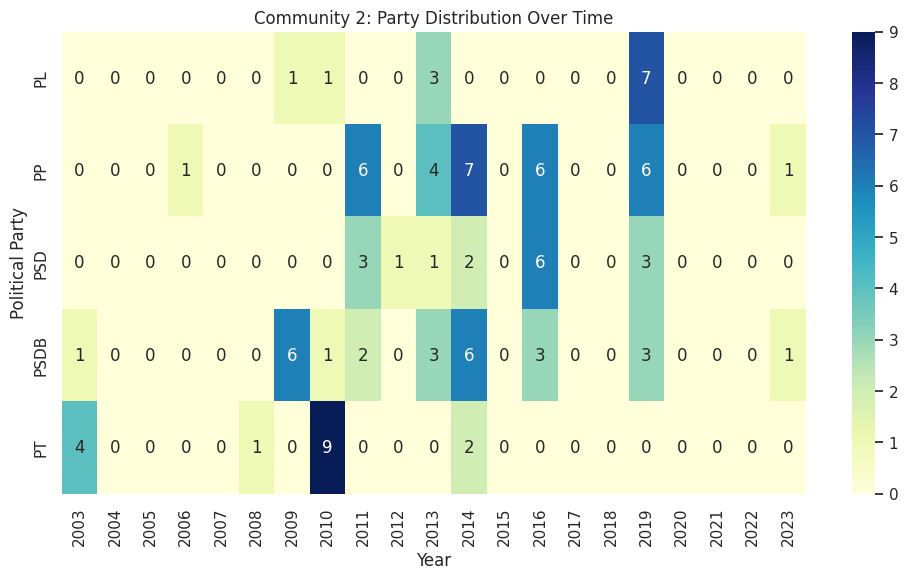

In [41]:
# Prepare data for heatmaps
# Melt the DataFrame to long format
melted_df = pd.melt(party_community_df, id_vars=['party'], var_name='Year_Community', value_name='Number of Deputies')

# Extract Year and Community from 'Year_Community'
melted_df[['Year', 'Community']] = melted_df['Year_Community'].str.split('_', expand=True)
melted_df['Year'] = melted_df['Year'].astype(int)
melted_df['Community'] = melted_df['Community'].astype(int)

# Filter for major parties
major_parties = ['PT', 'PSDB', 'PP', 'PL', 'PSD']
melted_df = melted_df[melted_df['party'].isin(major_parties)]

# Create a separate heatmap for each community
communities = [0, 1, 2]  # List of communities
for community in communities:
    community_df = melted_df[melted_df['Community'] == community]
    
    # Pivot table for heatmap
    heatmap_data = community_df.pivot_table(index='party', columns='Year', values='Number of Deputies', fill_value=0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Community {community}: Party Distribution Over Time')
    plt.xlabel('Year')
    plt.ylabel('Political Party')
    plt.show()